# Student Dropout Predictor

Notebook ini bertujuan untuk mengeksplorasi dann menganalisis faktor-faktor yang memengaruhi risiko _dropout_ mahasiswa serta membangun model _machine learning_ sebagai sistem peringatan dini bagi institusi pendidikan untuk melakukan intervensi lebih lanjut.

Dataset yang diambil bersumber dari [Dataset Performa Siswa Jaya Jaya Institut](https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance) dengan memiliki fitur target yaitu `Status` yang terdiri dari `Enrolled` yaitu mahsiswa yang sedang menempuh pendidikan, `Graduate` yaitu mahasiswa yang sudah lulus, dan `Dropout` adalah mahasiswa yang dikeluarkan (_dropout_).


## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, FunctionTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid')
sns.set_palette("Set2")

### Menyiapkan data yang akan diguankan

In [2]:
# Load dataset
df_raw = pd.read_csv('data.csv', sep=';')

df_raw.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dataset berisi 4424 mahasiswa dengan 37 fitur dengan kolom target yaitu `Status` dengan 3 kategori yaitu `Graduated`, `Enrolled`, dan `Dropout`.

In [4]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application_mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application_order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime_evening_attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous_qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous_qualification_grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mothers_qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Fathers_qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0


Dari deskripsi yang diperoleh, fitur Status memiliki 3 nilai unik, fitur `Curricular_units_1st_sem_grade` memiliki nilai kuartil pertama yaitu 11 dan ambang ini yang akan digunakan sebagai indikator "nilai rendah" dalam sistem _early warning_. Kemudian juga fitur seperti `Curricular_units_1st_sem_enrolled` dan `Curricular_units_1st_sem_approved` akan dibuat menjadi fitur baru untuk melihat rasio mata kuliah yang lulus.

In [5]:
# Periksa missing values
df_raw.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### Exploratory Data Analysis

Tahapan EDA dilakukan untuk memahami karakteristik data, distribusi variabel penting, serta hubungan awal antara performa akademik, kondisi finansial, dan status mahasiswa.

In [6]:
# Cek distribusi target variable
df_raw['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Pada kolom target `Status` memiliki 3 kategori yaitu `Graduate` sebanyak 2209, `Dropout` sebanyak 1421, dan `Enrolled` sebanyak 794. Untuk kebutuhan Exploratory Data Analysis, fitur target akan dipisahkan sesuai namanya dan kemudian menghitung fitur akademik dan finansial terhadap rata-rata target.

In [7]:
# Pisahkan data target untuk eksplorasi 
enrolled = df_raw[df_raw['Status'] == 'Enrolled']
graduate = df_raw[df_raw['Status'] == 'Graduate']
dropout = df_raw[df_raw['Status'] == 'Dropout']

academic_features = [
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_without_evaluations'
]

financial_features = [
    'Scholarship_holder',
    'Debtor',
    'Tuition_fees_up_to_date'
]

# Gabungkan semua fitur
all_features = academic_features + financial_features

# Hitung rata-rata per kelompok
comparison = pd.DataFrame({
    'Dropout': dropout[all_features].mean(),
    'Enrolled': enrolled[all_features].mean(),
    'Graduate': graduate[all_features].mean()
})

# Tampilkan tabel
print("=== PERBANDINGAN RATA-RATA FITUR PER KELOMPOK ===")
print(comparison.round(3))

=== PERBANDINGAN RATA-RATA FITUR PER KELOMPOK ===
                                              Dropout  Enrolled  Graduate
Curricular_units_1st_sem_grade                  7.257    11.125    12.644
Curricular_units_1st_sem_approved               2.552     4.319     6.232
Curricular_units_1st_sem_enrolled               5.821     5.965     6.670
Curricular_units_1st_sem_without_evaluations    0.192     0.178     0.088
Scholarship_holder                              0.094     0.164     0.378
Debtor                                          0.220     0.113     0.046
Tuition_fees_up_to_date                         0.678     0.947     0.987


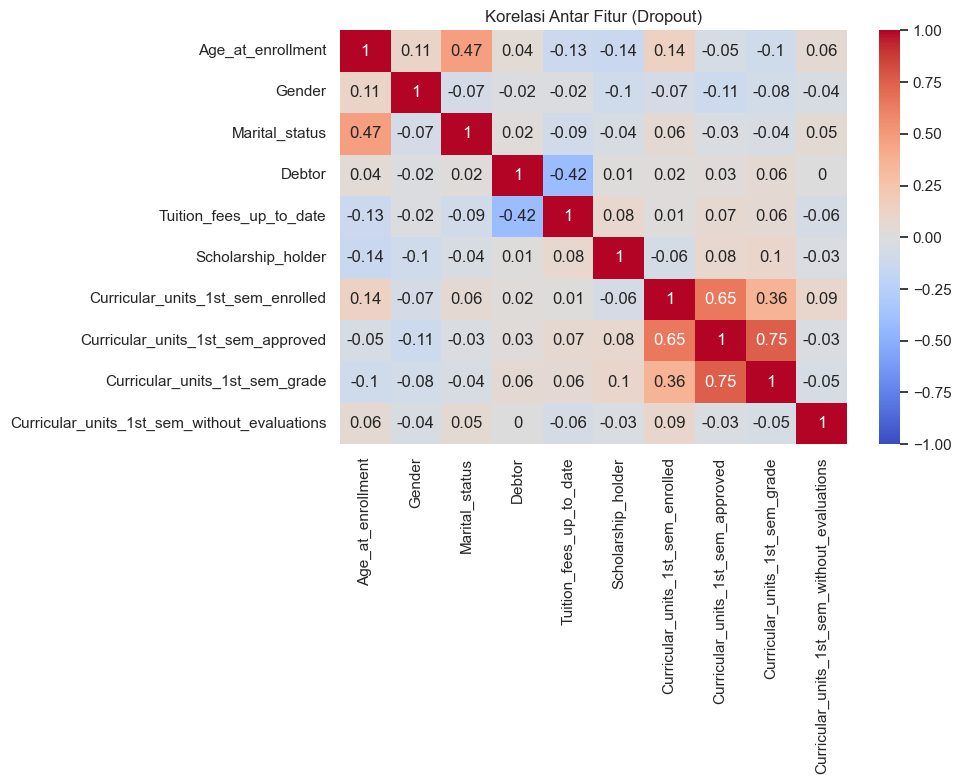

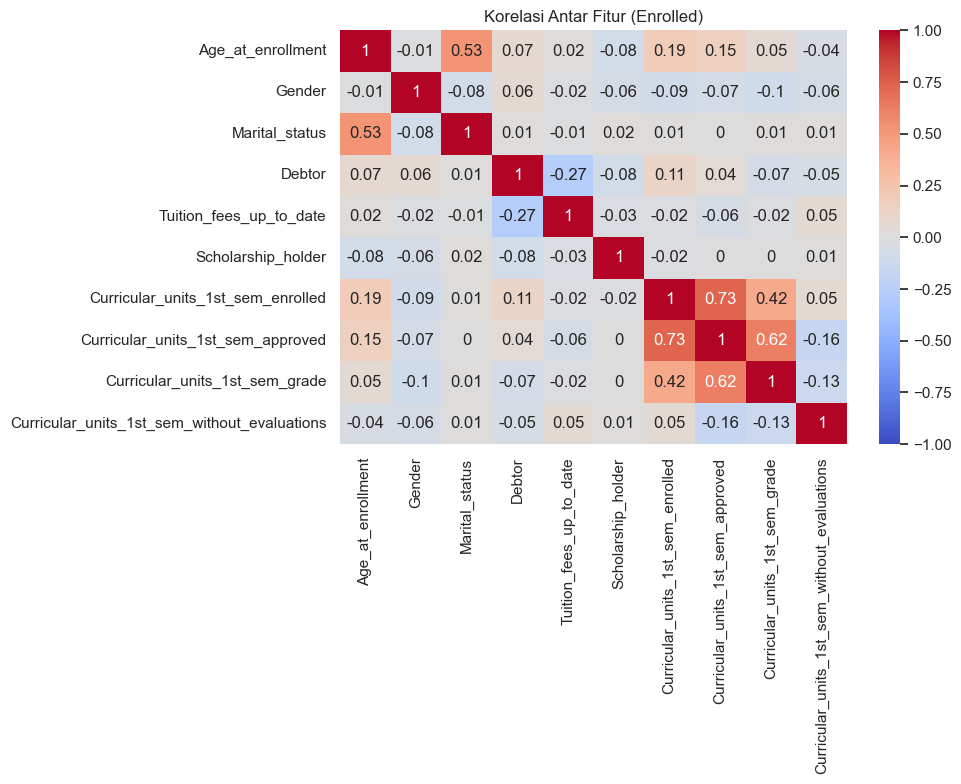

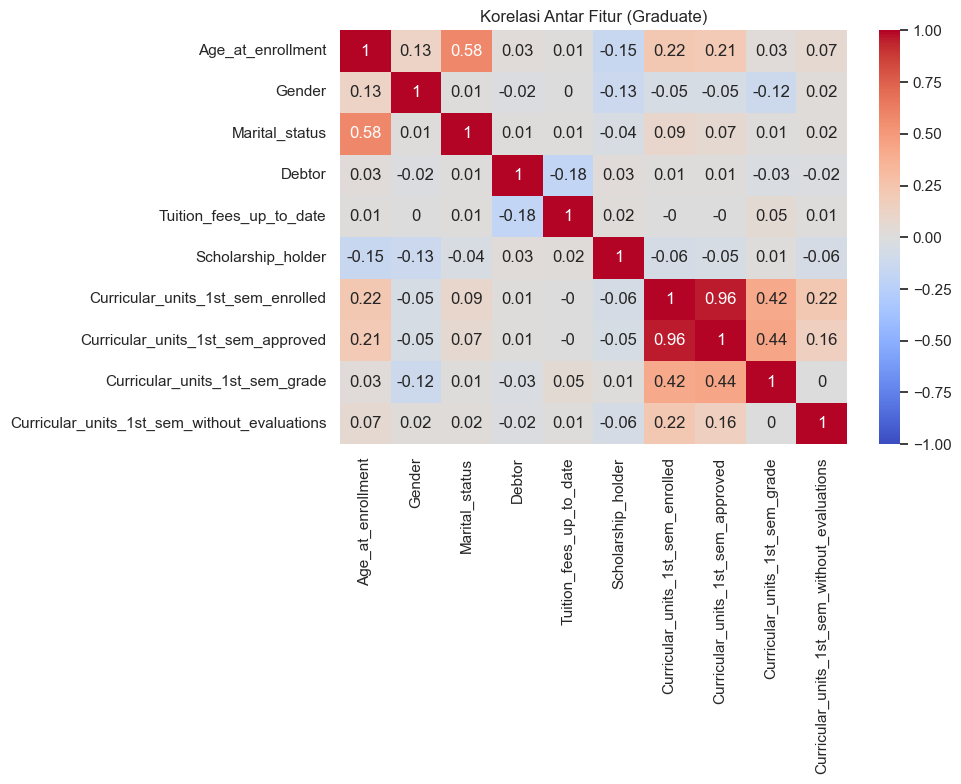

In [8]:
eda_cols = [
    'Age_at_enrollment',
    'Gender',
    'Marital_status',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations'
]

status_groups = {
    'Dropout': df_raw[df_raw['Status'] == 'Dropout'],
    'Enrolled': df_raw[df_raw['Status'] == 'Enrolled'],
    'Graduate': df_raw[df_raw['Status'] == 'Graduate']
}

for status, df_group in status_groups.items():
    corr = df_group[eda_cols].corr().round(2)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr,
        annot=True,
        cmap='coolwarm',
        center=0,
        vmin=-1,
        vmax=1
    )

    plt.title(f'Korelasi Antar Fitur ({status})')
    plt.tight_layout()
    plt.show()

Analisis korelasi antar fitur dilakukan secara terpisah untuk setiap status mahasiswa (`Dropout`, `Enrolled`, `Graduate`) guna memahami perbedaan pola internal. Hasil menunjukkan bahwa fitur akademik semester awal memiliki korelasi kuat dan konsisten di seluruh kelompok, sementara hubungan antara faktor finansial lebih menonjol pada kelompok `Dropout`. Temuan ini menjadi dasar dalam perancangan fitur turunan pada tahap _feature engineering_.

## Data Preparation / Preprocessing

In [9]:
# Cek missing values
df_raw.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [10]:
# Cek duplikasi data
df_raw.duplicated().sum()

0

Setelah dicek, data tidak memiliki _missing values_ dan duplikasi. Karena akan dicari prediksi siswa yang kemungkinan `Dropout`, maka akan dibuat fitur baru bernama `Target` dengan asumsi bahwa siswa yang sudah `Graduate` tidak memiliki kemungkinan untuk _dropout_ artinya `Dropout` dan `Enrolled` akan digabung menjadi satu. Kemudian, akan dibuat fitur baru untuk mendukung model.

In [11]:
df = df_raw.copy()

# Mapping target
df['Target'] = df['Status'].map({
    'Dropout': 1,
    'Enrolled': 1,
    'Graduate': 0
})

# Drop kolom Status
df = df.drop(columns=['Status'])

In [12]:
# Base features
base_features = [
    'Age_at_enrollment',
    'Gender',
    'Marital_status',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations'
]

### Feauture Engineering

Feature engineering dilakukan untuk menangkap pola yang tidak terlihat secara langsung, seperti efisiensi akademik dan kombinasi risiko finansial dan akademik.

In [13]:
def feature_engineering(X):
    X = X.copy()
    X['approval_rate_1st'] = (
        X['Curricular_units_1st_sem_approved'] /
        (X['Curricular_units_1st_sem_enrolled'] + 1e-5)
    )
    X['low_grade_1st'] = (X['Curricular_units_1st_sem_grade'] < 10).astype(int)
    X['inactive_ratio'] = (X['Curricular_units_1st_sem_without_evaluations'] /
    (X['Curricular_units_1st_sem_enrolled'] + 1e-5))
    X['financial_risk'] = ((X['Debtor'] == 1) | (X['Tuition_fees_up_to_date'] == 0)).astype(int)
    X['low_grade_financial_risk'] = ((X['low_grade_1st'] == 1) & (X['financial_risk'] == 1)).astype(int)
    return X

In [14]:
# Pisahkan fitur dan target
X = df[base_features]
y = df['Target']

In [15]:
num_cols = [
    'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'approval_rate_1st',
    'inactive_ratio'
]

cat_cols = [
    'Gender',
    'Marital_status',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'low_grade_1st',
    'financial_risk',
    'low_grade_financial_risk'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
    ],
    remainder='drop'
)

In [16]:
full_pipeline = Pipeline([
    ('feature_engineering',
     FunctionTransformer(feature_engineering, validate=False)),
    ('preprocessing', preprocessor)
])

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [18]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

## Modeling

In [19]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train_prepared, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Model yang digunakan yaitu _Random Forest Classifier_ dengan parameter:
- `n_estimators=100` yaitu jumlah pohon keputusan
- `random_state=42`, untuk reproducibility
- `class_weight='balanced'`, berfungsi menangani ketidakseimbangan kelas.

## Evaluation

In [20]:
# Evaluasi model dengan threshold kustom
y_proba = model.predict_proba(X_test_prepared)[:, 1]
y_pred = (y_proba >= 0.37).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       442
           1       0.72      0.81      0.76       443

    accuracy                           0.75       885
   macro avg       0.75      0.75      0.75       885
weighted avg       0.75      0.75      0.75       885



In [21]:
# Feature importance
feature_names = full_pipeline.named_steps['preprocessing'].get_feature_names_out()

feat_imp = (
    pd.Series(model.feature_importances_, index=feature_names)
    .sort_values(ascending=False)
)

feat_imp.index = (
    feat_imp.index
        .str.replace('num__', '')
        .str.replace('cat__', '')
)

print(feat_imp.head())

Curricular_units_1st_sem_grade       0.263297
approval_rate_1st                    0.214821
Curricular_units_1st_sem_approved    0.155117
Age_at_enrollment                    0.119427
Curricular_units_1st_sem_enrolled    0.051555
dtype: float64


Dengan menggunakan nilai threshold 0.37, model memberikan hasil yang baik yaitu `Accuracy` sebesar 75%. `Recall` untuk `Dropout` sebesar 81% yang artinya model berhasil menangkap 81% dari mahasiswa yang benar-benar _dropout_ dan `Precision` untuk _dropout_ sebesar 72%, yang menunjukkan bahwa sebagian besar prediksi _dropout_ yang dihasilkan model memang relevan, meskipun masih terdapat _false positive_ yang merupakam konteks _early warning system_. Model juga memberikan informasi berupa 5 fitur penting yaitu `Curricular_units_1st_sem_grade`, `approval_rate_1st`, `Curricular_units_1st_sem_approved`, `Age_at_enrollment`, dan `Tuition_fees_up_to_date`.

In [22]:
# Simpan model
joblib.dump(model, "model.joblib")
joblib.dump(feat_imp.index.tolist(), "feature_order.joblib")

['feature_order.joblib']

Setelah model selesai dilatih, akan disimpan menjadi `model.joblib` beserta dengan `feature_order.joblib` untuk di _deploy_ di Streamlit.